In [54]:
from sklearn.neural_network import MLPClassifier
from sklearn import preprocessing
from sklearn.model_selection import train_test_split 
from apyori import apriori
import os
import sys
import xgboost as xgb
import matplotlib.pyplot as plt
from sklearn.svm import LinearSVC
from sklearn.datasets import make_classification

In [59]:
printing_mode = True

On importe le travail préalable

In [56]:
%run import_data

Les variables qui, d'un premier abord, semblent inutiles.

In [80]:
colonnes_inutiles = ['num_veh',
                                'Num_Acc']
""",
                                'locp',
                                'actp',
                                'etatp',
                                'catv',
                                'hrmn',
                                'mois',
                                'jour',
                                'catvopp',
                                'occutc',
                                'place']
"""

",\n                                'locp',\n                                'actp',\n                                'etatp',\n                                'catv',\n                                'hrmn',\n                                'mois',\n                                'jour',\n                                'catvopp',\n                                'occutc',\n                                'place']\n"

In [64]:
merged_data = merged_data.drop(colonnes_inutiles,axis = 1)

In [ ]:
df = pd.get_dummies(merged_data, columns = merged_data.columns)
results = list(apriori(df))

In [7]:
y = merged_data.grav

In [82]:
merged_data_sans_grav = merged_data.drop(['grav'],axis = 1)

In [79]:
for x in merged_data_sans_grav.columns:
    print(merged_data_sans_grav[x][0])

merged_data_sans_grav.columns

201600000001
1.0
1
2
11.0
0.0
0.0
0.0
1983.0
B02
0.0
7
0
0.0
0.0
1.0
1.0
2
1
1445
1
2
1
8
3
3
2
2
1


Index(['Num_Acc', 'place', 'catu', 'sexe', 'secu', 'locp', 'actp', 'etatp',
       'an_nais', 'num_veh', 'senc', 'catv', 'occutc', 'obs', 'obsm', 'choc',
       'manv', 'mois', 'jour', 'hrmn', 'lum', 'agg', 'int', 'atm', 'col',
       'mom', 'catvopp', 'catv_gen', 'catvopp_gen'],
      dtype='object')

In [10]:
#min_max_scaler = preprocessing.MinMaxScaler()
#np_scaled = min_max_scaler.fit_transform(merged_data)
#merged_data = pd.DataFrame(np_scaled)

In [81]:
X_train, X_test, y_train, y_test = train_test_split(merged_data_sans_grav, 
                                                    y, 
                                                    test_size=0.2, 
                                                    random_state=42)

listing_apriori_bis = []
data_accident = merged_data[merged_data.grav == 4].drop('grav', axis = 1)



for indexe in data_accident.index:
    event = []
    for colonne in data_accident.columns:
        if not (data_accident[colonne][indexe] == 0):
            event.append(colonne + str(data_accident[colonne][indexe]))
    listing_apriori_bis.append(event)

len(listing_apriori_bis)



min_sup = 0.40
min_conf = 0.90
results = list(apriori(listing_apriori_bis, min_support = min_sup, min_confidence = min_conf))

print(len(results))

os.system('say "fini"')

71


0

In [60]:
if printing_mode:
    for x in range(0,len(results)):
        print(results[x].items)
        print('support')
        print(results[x].support)
        print('confiance')
        print(results[x].ordered_statistics[0].confidence)


frozenset({'place1.0', 'catu1'})
support
0.6602363809265045
confiance
1.0
frozenset({'catv_gen2', 'catv7'})
support
0.6728705338948513
confiance
1.0
frozenset({'secu11.0', 'catv_gen2'})
support
0.6037223203369108
confiance
0.9493697927793207
frozenset({'catvopp_gen2', 'catvopp7'})
support
0.7335959788072273
confiance
1.0
frozenset({'agg1', 'catv_gen2', 'catv7'})
support
0.43105556310283927
confiance
1.0
frozenset({'secu11.0', 'agg1', 'catv_gen2'})
support
0.420595027849477
confiance
0.9485294117647058
frozenset({'catvopp_gen2', 'agg1', 'catvopp7'})
support
0.4161119413123217
confiance
1.0
frozenset({'place1.0', 'atm1', 'catu1'})
support
0.5249286781687271
confiance
1.0
frozenset({'catv7', 'catv_gen2', 'atm1'})
support
0.5110718652357017
confiance
1.0
frozenset({'secu11.0', 'catv_gen2', 'atm1'})
support
0.45673142236109227
confiance
0.9462426118772868
frozenset({'catvopp_gen2', 'atm1', 'catvopp7'})
support
0.5659557125390572
confiance
1.0
frozenset({'catv_gen2', 'catv7', 'catu1'})
suppo

In [61]:
listing_apriori_bis

[['Num_Acc201600000004',
  'place2.0',
  'catu2',
  'sexe1',
  'secu23.0',
  'an_nais1999.0',
  'num_vehB02',
  'catv32',
  'choc1.0',
  'manv1.0',
  'mois8',
  'jour15',
  'hrmn1930',
  'lum2',
  'agg2',
  'int1',
  'atm7',
  'col3',
  'mom4',
  'catvopp7',
  'catv_gen1',
  'catvopp_gen2'],
 ['Num_Acc201600000007',
  'place2.0',
  'catu2',
  'sexe1',
  'secu21.0',
  'an_nais2001.0',
  'num_vehA01',
  'senc1.0',
  'catv30',
  'choc3.0',
  'manv15.0',
  'mois5',
  'jour1',
  'hrmn1145',
  'lum1',
  'agg2',
  'int1',
  'atm7',
  'col2',
  'mom1',
  'catvopp7',
  'catv_gen1',
  'catvopp_gen2'],
 ['Num_Acc201600000016',
  'place1.0',
  'catu1',
  'sexe1',
  'secu21.0',
  'an_nais1994.0',
  'num_vehA01',
  'catv33',
  'obsm2.0',
  'choc2.0',
  'manv1.0',
  'mois9',
  'jour8',
  'hrmn815',
  'lum1',
  'agg1',
  'int1',
  'atm1',
  'col5',
  'mom1',
  'catvopp7',
  'catv_gen1',
  'catvopp_gen2'],
 ['Num_Acc201600000019',
  'place2.0',
  'catu2',
  'sexe2',
  'secu11.0',
  'an_nais1994.0',
  '

On essaie de prédire la vraie catégorie

In [83]:


### Préparation des données
X_train, X_test, y_train, y_test = train_test_split(merged_data_sans_grav, y, test_size=0.1)


train_X = X_train.as_matrix()
test_X = X_test.as_matrix()
train_y = y_train


### Parametres
max_depth=10
learning_rate=0.01
n_estimators=100
silent=True
objective='binary:logistic'
booster='gblinear'
n_jobs=100
nthread=None
gamma=0.1
min_child_weight=1
max_delta_step=0
subsample=1
colsample_bytree=1
colsample_bylevel=1
reg_alpha=0.5
reg_lambda=1
scale_pos_weight=1
base_score=0.5
random_state=0
seed=None
missing=None


### Training
gbm = xgb.XGBClassifier(max_depth = max_depth, 
                        n_estimators = n_estimators, 
                        learning_rate = learning_rate,
                        gamma = gamma,
                        reg_alpha= reg_alpha).fit(train_X, train_y)


### Predictions
predictions = gbm.predict(test_X)


### Resultats
pourcentage = (predictions - y_test).replace(to_replace = [-4,-3,-2,-1,1,2,3,4], value = -1)
print(1 + sum(pourcentage)/len(pourcentage))

0.587600246761


Ici on essaie juste de prédire grave / pas grave

In [84]:
X_train, X_test, y_train, y_test = train_test_split(merged_data_sans_grav, y, test_size=0.25)

cat1 = [1]
cat2 = [2,3,4]

y_train = y_train.replace(cat1,0)
y_train = y_train.replace(cat2,1)
y_test = y_test.replace(cat1,0)
y_test = y_test.replace(cat2,1)

train_X = X_train.as_matrix()
test_X = X_test.as_matrix()
train_y = y_train

# You can experiment with many other options here, using the same .fit() and .predict()
# methods; see http://scikit-learn.org
# This example uses the current build of XGBoost, from https://github.com/dmlc/xgboost
gbm = xgb.XGBClassifier(max_depth = max_depth, 
                        n_estimators = n_estimators, 
                        learning_rate = learning_rate,
                        gamma = gamma,
                        reg_alpha= reg_alpha).fit(train_X, train_y)
predictions = gbm.predict(test_X)

pourcentage = (predictions - y_test).replace(to_replace = [-4,-3,-2,-1,1,2,3,4], value = -1)
print(1 + sum(pourcentage)/len(pourcentage))

0.815175817397


In [85]:
print(X_train.shape,
X_test.shape, y_train.shape, y_test.shape
     )

(24312, 27) (8105, 27) (24312,) (8105,)


1716 4891 1161 337


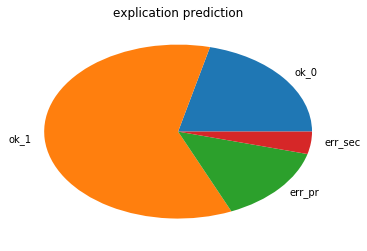

In [86]:
length = len(predictions)
y_test_liste = list(y_test)
ok_0 = 0
ok_1 = 0
err_pr = 0
err_sec = 0
for iteration in range(0,length):
    if predictions[iteration] == 0:
        if y_test_liste[iteration] == 0:
            ok_0 += 1
        else:
            err_sec += 1
    else:
        if y_test_liste[iteration] == 1:
            ok_1 += 1
        else:
            err_pr +=1
print(ok_0,ok_1,err_pr, err_sec)
labels = ['ok_0','ok_1','err_pr', 'err_sec']
values = [ok_0,ok_1,err_pr, err_sec]
plt.pie(values, labels = labels)
plt.title('explication prediction' )
plt.show()
plt.close()

In [87]:
y_sexe = merged_data.sexe
merged_data_sans_sexe = merged_data.drop(['sexe'],axis = 1)


X_train, X_test, y_train, y_test = train_test_split(merged_data_sans_grav, y, test_size=0.1)

cat1 = [1,3,4]
cat2 = [2]

y_train = y_train.replace(cat1,0)
y_train = y_train.replace(cat2,1)
y_test = y_test.replace(cat1,0)
y_test = y_test.replace(cat2,1)

train_X = X_train.as_matrix()
test_X = X_test.as_matrix()
train_y = y_train

# You can experiment with many other options here, using the same .fit() and .predict()
# methods; see http://scikit-learn.org
# This example uses the current build of XGBoost, from https://github.com/dmlc/xgboost
gbm = xgb.XGBClassifier(max_depth = max_depth, 
                        n_estimators = n_estimators, 
                        learning_rate = learning_rate,
                        gamma = gamma,
                        reg_alpha= reg_alpha).fit(train_X, train_y)
predictions = gbm.predict_proba(test_X)



In [88]:
def TP(theta,pred,result):
    count = 0
    i = 0
    for x in (result):
        if pred[i][1] > theta and x == 1:
            count += 1
        i += 1
    return count

def FP(theta,pred,result):
    count = 0
    i = 0
    for x in (result):
        if pred[i][1] >= theta and x == 0:
            count += 1
        i += 1
    return count

def TN(theta,pred,result):
    count = 0
    i = 0
    for x in (result):
        if pred[i][1] < theta and x == 0:
            count += 1
        i += 1
    return count

def FN(theta,pred,result):
    count = 0
    i = 0
    for x in (result):
        if pred[i][1] < theta and x == 1:
            count += 1
        i += 1
    return count



In [89]:
class ROC_curves:
    def __init__(self, pred = predictions, res = y_test, gran = 101):
        x = []
        y = []
        for j in range(0,gran):
            tn = TN(j/(gran-1),pred,res)
            neg = tn + FP(j/(gran-1),pred,res)
            tp = TP(j/(gran-1),pred,res)
            pos = tp + FN(j/(gran-1),pred,res)

            if neg == 0:
                x.append(0)
            else:
                x.append(tn / neg)
            if pos == 0:
                y.append(0)
            else:
                y.append(tp / pos)
        self.rocx = x
        self.rocy = y
    def plot_it(self):
        plt.plot(self.rocx,self.rocy)
        plt.show()
    


In [90]:
ROC = ROC_curves()


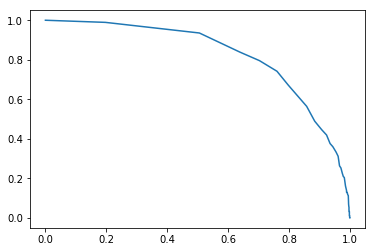

ValueError: feature_names mismatch: ['f0', 'f1', 'f2', 'f3', 'f4', 'f5', 'f6', 'f7', 'f8', 'f9', 'f10', 'f11', 'f12', 'f13', 'f14', 'f15', 'f16', 'f17', 'f18', 'f19', 'f20', 'f21', 'f22', 'f23', 'f24', 'f25', 'f26'] ['place', 'catu', 'sexe', 'secu', 'locp', 'actp', 'etatp', 'an_nais', 'senc', 'catv', 'occutc', 'obs', 'obsm', 'choc', 'manv', 'mois', 'jour', 'hrmn', 'lum', 'agg', 'int', 'atm', 'col', 'mom', 'catvopp', 'catv_gen', 'catvopp_gen']
expected f19, f9, f7, f0, f2, f3, f18, f16, f26, f23, f21, f15, f4, f20, f6, f10, f14, f12, f24, f8, f11, f13, f1, f17, f25, f5, f22 in input data
training data did not have the following fields: jour, mom, mois, catu, secu, locp, occutc, an_nais, choc, place, senc, obs, lum, catv_gen, agg, col, actp, etatp, int, obsm, hrmn, catvopp_gen, manv, sexe, catv, atm, catvopp

In [91]:
ROC.plot_it()


predictions = gbm.predict(X_test)
length = len(predictions)
y_test_liste = list(y_test)
ok_0 = 0
ok_1 = 0
err_pr = 0
err_sec = 0
for iteration in range(0,length):
    if predictions[iteration] == 0:
        if y_test_liste[iteration] == 0:
            ok_0 += 1
        else:
            err_sec += 1
    else:
        if y_test_liste[iteration] == 1:
            ok_1 += 1
        else:
            err_pr +=1
print(ok_0,ok_1,err_pr, err_sec)
labels = ['ok_0','ok_1','err_pr', 'err_sec']
values = [ok_0,ok_1,err_pr, err_sec]
plt.pie(values, labels = labels)
plt.title('explication prediction' )
plt.show()
plt.close()

In [ ]:
sum(y_train)/len(y_train)

In [ ]:
clf = LinearSVC(random_state=0, C = 123)
clf.fit(X_train,y_train)

In [ ]:
X_test.head()

In [ ]:
predictors = ['catu', 'choc', 'mom', 'catv_gen','catvopp_gen']
X_train = X_train[predictors]
X_test = X_test[predictors]
clf = LinearSVC( C = 123, max_iter=12)
clf.fit(X_train,y_train)

predictions = clf.predict(X_test)
length = len(predictions)
y_test_liste = list(y_test)
ok_0 = 0
ok_1 = 0
err_pr = 0
err_sec = 0
for iteration in range(0,length):
    if predictions[iteration] == 0:
        if y_test_liste[iteration] == 0:
            ok_0 += 1
        else:
            err_sec += 1
    else:
        if y_test_liste[iteration] == 1:
            ok_1 += 1
        else:
            err_pr +=1
print(ok_0,ok_1,err_pr, err_sec)
labels = ['ok_0','ok_1','err_pr', 'err_sec']
values = [ok_0,ok_1,err_pr, err_sec]
plt.pie(values, labels = labels)
plt.title('explication prediction' )
plt.show()
plt.close()

In [ ]:
set(predictions)
sum(predictions)